In [1]:
import datetime

In [5]:
import yfinance as yf

msft = yf.Ticker("MSFT")

# get stock info
msft.info

# get historical market data
hist = msft.history(period="max")

# show actions (dividends, splits)
msft.actions

# show dividends
msft.dividends

# show splits
msft.splits

# show financials
msft.financials
msft.quarterly_financials

# show major holders
msft.major_holders

# show institutional holders
msft.institutional_holders

# show balance sheet
msft.balance_sheet
msft.quarterly_balance_sheet

# show cashflow
msft.cashflow
msft.quarterly_cashflow

# show earnings
msft.earnings
msft.quarterly_earnings

# show sustainability
msft.sustainability

# show analysts recommendations
msft.recommendations

# show next event (earnings, etc)
msft.calendar

# show ISIN code - *experimental*
# ISIN = International Securities Identification Number
msft.isin

# show options expirations
msft.options


('2021-04-16',
 '2021-04-23',
 '2021-04-30',
 '2021-05-07',
 '2021-05-14',
 '2021-05-21',
 '2021-05-28',
 '2021-06-18',
 '2021-07-16',
 '2021-08-20',
 '2021-09-17',
 '2021-10-15',
 '2022-01-21',
 '2022-03-18',
 '2022-06-17',
 '2022-09-16',
 '2023-01-20',
 '2023-03-17',
 '2023-06-16')

In [7]:
msft.recommendations

,Firm,To Grade,From Grade,Action
Date,,,,
2012-03-16 08:19:00,Argus Research,Buy,,up
2012-03-19 14:00:00,Hilliard Lyons,Long-Term Buy,,main
2012-03-22 07:03:00,Morgan Stanley,Overweight,,main
2012-04-03 11:53:00,UBS,Buy,,main
2012-04-20 06:18:00,Deutsche Bank,Buy,,main
...,...,...,...,...
2021-01-27 17:44:01,B of A Securities,Buy,,main
2021-01-28 18:11:05,Argus Research,Buy,,main
2021-02-02 10:28:34,Piper Sandler,Overweight,,reit


In [36]:
slice_df = hist[hist.index >= datetime.datetime(year=2020, month=1, day=1)]

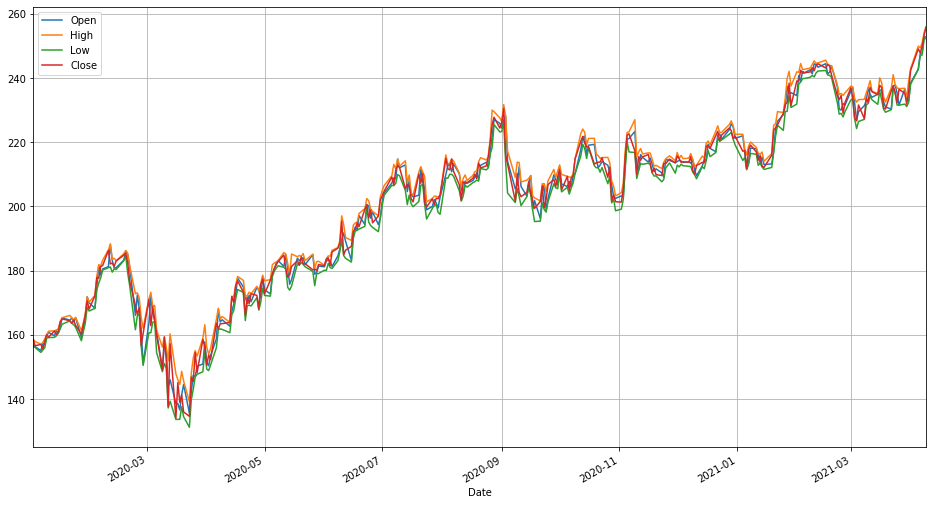

In [37]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(facecolor='white')
slice_df[['Open', 'High', 'Low', 'Close']].plot(figsize=(16,9), ax=ax)
ax.grid()
plt.show()

In [43]:
slice_df['date'] = slice_df.index.values

/Users/aavidan/envs/torch/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [234]:
from mpl_finance import candlestick_ohlc as candlestick
candlestick(ax, slice_df[['date', 'Open', 'High', 'Low', 'Close']],  ochl=True)

In [313]:
class telegramBot():
    def __init__(self, token, portfolios=[], timeout=100):
        self.token = token
        self.portfolios = {p.broker: p for p in portfolios}
        self.names = list(self.portfolios.keys())
        self.timeout = timeout
        self.url = f"https://api.telegram.org/bot{self.token}"
        self.from_ = None
        
    def get_updates(self,offset=None):
            # In 100 seconds if user input query then process that, use it as the read timeout from the server
            url = self.url+f"/getUpdates?timeout={self.timeout}"    
            if offset:
                url = url+f"&offset={offset+1}"
            url_info = requests.get(url)
            return json.loads(url_info.content)
        
    def send_message(self, msg, chat_id):
            url = self.url + f"/sendMessage?chat_id={chat_id}&text={msg}"
            if msg is not None:
                requests.get(url)
                
    def grab_token(self):
            return tokens
        
    def loop_for_telegram(self):
        update_id = None
        loop = True
        self.tbot_out('tracking your portfolio..')
        while loop:
            updates = self.get_updates(offset=update_id)
            
            if updates:
                updates = updates['result']
                for item in updates:
                    update_id = item["update_id"]
                    print(update_id)
                    try:
                        message = item["message"]["text"]
                        from_ = item["message"]["from"]["id"]
                    except:
                        message, from_ = None, None
                        
                    print('user:', from_, 'message:', message)
                    response = self.add_user_input(message, from_=from_)
                    print("standing by ...")
        print('telegram loop exit')
        
    def tbot_out(self, message):
        if isinstance(message, list):
            message = '\n'.join(message)
        if self.from_:
            print('sending tbot message ..')
            self.send_message(message, self.from_)
            
    def send_photo(self, file_path):
        method = "sendPhoto"
        if self.from_:
            print('sending tbot image ..')
        params = {'chat_id': self.from_}
        files = {'photo': open(file_path, 'rb')}
        api_url = self.url + f"/{method}?"
        resp = requests.post(api_url, params, files=files)
        return resp
    
    def match_words_in_user_input(self, user_input, words, ret_ind=False):
        for w in words:
            if w in user_input:
                if ret_ind:
                    return True, user_input.index(w)
                return True
        if ret_ind:
            return False, None
        return False
    
    def get_matches_in_user_input(self, user_input, words, ret_org_if_no_match=True):
        matches = []
        for w in words:
            if w in user_input:
                matches.append(w)
        if ret_org_if_no_match and len(matches) == 0:
            return words
        return matches
    
    def add_user_input(self, user_input, from_=None):
        responded = False
        user_input_split = user_input.split()

        if from_:
            self.from_ = from_
        
        plot = self.match_words_in_user_input(user_input_split, ['plot', 'chart'])
        names = self.get_matches_in_user_input(user_input_split, self.names)
        charts = self.get_matches_in_user_input(user_input_split, ['equity', 'pnl'])
        prices = self.match_words_in_user_input(user_input_split, ['price', 'prices'])
        symbols, s_ind = self.match_words_in_user_input(
            user_input_split, ['symbol', 'symbols', 'stock', 'stocks', 'symbols:', 'symbol:'], ret_ind=True)
        status = self.match_words_in_user_input(user_input_split, ['profit', 'status'])
        open_pos = self.get_matches_in_user_input(
            user_input_split, ['open', 'symbol', 'quantity', 'price', 'broker'], ret_org_if_no_match=False)
                
        if status:
            for broker in names:
                self.tbot_out(f'collecting prices for stocks under: {broker}..')
                response = []
                response.extend(self.portfolios[broker].update_pnl(prices=prices))
                self.tbot_out(response)
                responded = True
                
        if symbols and 'open' not in user_input_split:
            for s in user_input_split[s_ind+1:]:
                self.portfolios[names[0]].current_price(s, prices=True)
                responded = True
                
        if plot:
            days = None
            if 'days' in user_input_split:
                try:
                    days = int(user_input_split[user_input_split.index('days')+1])
                except:
                    pass
            for broker in names:
                major_loc = {'bh':4, 'etoro':1}[broker]
                for c in charts:
                    self.tbot_out(f'fetching {c} chart for: {broker}..')
                    path = self.portfolios[broker].plot_chart(c, to_file=True, major_loc=major_loc, broker=broker, days=days)
                    resp = self.send_photo(path)
                    responded = True
        
        if 0 < len(open_pos) < 5:
            self.tbot_out('to open position use this format:\nopen symbol AAPL price 120.25 quatity 12 broker etoro')
            responded = True
        elif len(open_pos) == 5:
            broker = user_input_split[user_input_split.index('broker')+1]
            if broker in self.names:
                symbol = user_input_split[user_input_split.index('symbol')+1]
                quantity = float(user_input_split[user_input_split.index('quantity')+1])
                price = float(user_input_split[user_input_split.index('price')+1])
                self.tbot_out(f'opening position. broker: {broker}, symbol: {symbol}, quantity: {quantity}, price: {price}')
                self.portfolios[broker].add_position(symbol, price, quantity)
                self.tbot_out(self.portfolios[broker].update_pnl(prices=True))
            else:
                self.tbot_out('broker could only be etoro/bh')
            responded = True
                    
        if not responded:
            self.tbot_out('try one of these:\nplot equity or pnl\nget status\pnl\nprice status\nprice for symbols: APPL, NVDA, etc..')
        

In [235]:
trading_day()

'2021-04-15'

In [314]:
import os
import json
import requests
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import (AutoMinorLocator, MultipleLocator)
import seaborn as sns
import numpy as np
from forex_python.converter import CurrencyRates
from yahoo_fin import stock_info as si
import yfinance as yf
pd.set_option("precision", 2)

TBOT = False

def trading_day(open_market='16:30'):
    def hour_to_float(hours=16, minutes=30):
        return int(hours)+int(minutes)/60

    def str_hour_to_float(hour='16:30'):
        return int(hour.split(':')[0])+int(hour.split(':')[1])/60
    
    trade_day = datetime.datetime.now()
    day_off = -1
    if hour_to_float(trade_day.hour, trade_day.minute) > str_hour_to_float(open_market):
        day_off = 0
    td = (datetime.datetime.now() + datetime.timedelta(days=day_off))
    return str(datetime.datetime(year=td.year, day=td.day, month=td.month)).split()[0]

class Portfolio():
    def __init__(self, broker, start_balance=10000, portfolio_csv='', pnl_csv=''):
        self.hist_data = {}
        self.broker = broker
        self.start_balance = start_balance
        self.set_trade_day()
        self.converter = CurrencyRates()
        self.USDILS = self.converter.get_rate('USD', 'ILS')
        self.USDHKD = self.converter.get_rate('USD', 'HKD')
        self.otc_currencies = {'XIACY': 14.70, 'XIACF': 3.3, 'INVZ': 10} 
        self.load_portfolio_from_csv(portfolio_csv)
        self.load_pnl_csv(pnl_csv)
        self.update_pnl(prices=True)
        
    def set_trade_day(self):
        self.trade_day = self.get_trading_day()
        
    def print_status(self):
        status = []
        status.append(f'account: {self.broker}')
        status.append(f'equity: ${self.equity:.2f}')
        status.append(f'allocated: ${self.allocated:.2f}')
        status.append(f'cash: ${self.cash:.2f}')
        status.append(f'current pnl: ${self.current_pnl:.2f}')
        if len(self.pnl.pnl.values) > 1:
            status.append(f'dif from previous day: ${round(self.pnl.pnl.values[-1]-self.pnl.pnl.values[-2], 2):.2f}')
        print('\n'.join(status))
        return status
        
    def save_csvs(self):
        self.set_trade_day()
        pos_path = f'csvs/{self.broker}_pnl_{self.trade_day}.csv'
        pnl_path = f'csvs/{self.broker}_portfolio_{self.trade_day}.csv'
        self.pnl.to_csv(pos_path)
        self.positions.to_csv(pnl_path)
        print('positions saved to path:', pos_path)
        print('pnl saved to path:', pnl_path)

    def load_portfolio_from_csv(self, portfolio_csv=''):
        if portfolio_csv == '':
            portfolio_csv = f'{self.broker}_portfolio_{self.trade_day}.csv'
        if os.path.exists(portfolio_csv):
            self.positions = pd.read_csv(portfolio_csv, index_col=0)
#             self.set_usd_value('open_price')
            print('loaded positions from path:', portfolio_csv)
        else:
            self.positions = pd.DataFrame()
            
    def get_price(self, symbol):
        data = si.get_quote_table(symbol)
        price = round(data['Quote Price'], 2)
        prev = data['Previous Close']
        dif = round(price - prev, 2)
        dif_prec = round(dif/prev*100, 2)
        sign = '+' if dif >= 0 else ''
        space1 = ' '*(6-len(symbol))
        space2 = ' '*(8-len(f'{price:.2f}'))
        space3 = ' '*(8-len(f'{sign}{dif:.2f}'))
        
        text_out = f'symbol: {symbol},{space1}price: ${price:.2f},{space2}dif: ${sign}{dif:.2f},{space3}{sign}{dif_prec:.2f}%'
        return price, prev, text_out
            
    def current_price(self, symbol, prices=False):
        price = np.nan
        text_out = None
        try:
            price, prev, text_out = self.get_price(symbol)
        except:
            pass
        if np.isnan(price) and symbol in self.otc_currencies:
            return self.otc_currencies[symbol]
        if TBOT and (self.prices or prices):
            if text_out:
                tbot.tbot_out(text_out)
        else:
            if text_out:
                print(text_out)
        return price
        
    def add_current_price(self, row):
        if row['symbol'] == 'TCEHY':
            return self.current_price(row['symbol'])*self.USDHKD
        return self.current_price(row['symbol'])
    
    def set_current_value(self):
        self.positions['price'] = self.positions.apply(lambda row: self.add_current_price(row), axis=1)
        self.set_usd_value('price')
        self.allocated = round(self.positions.value_usd.sum(), 2)
    
    def get_usd_value(self, row, feat='price'):
        if row['currency'] == 'USD':
            return row[feat]*row['quantity']
        else:
            return row[feat]*row['quantity']/self.converter.get_rate('USD', row['currency'])
    
    def set_usd_value(self, feat='price'):
        trg_feat = {'open_price': 'open_value_usd', 'price': 'value_usd'}[feat]
        self.positions[trg_feat] = self.positions.apply(lambda row: self.get_usd_value(row, feat), axis=1)
    
    def add_position(self, symbol, price, quantity, currency='USD', date=datetime.datetime.today()):
        line = {'symbol': symbol, 'open_price': price, 'quantity': quantity, 'currency': currency, 'open_date': date,
                'broker': self.broker}
        line['open_value_usd'] = self.get_usd_value(line, 'open_price')
        self.positions = self.positions.append(line, ignore_index=True)
        
    def set_pnl(self):
        self.positions['p/l'] = self.positions.apply(lambda row: row['value_usd']-row['open_value_usd'], axis=1)
        self.positions = self.positions.sort_values(by='p/l')
        self.current_pnl = round(self.positions['p/l'].sum(), 2)
        self.positions['p/l_ils'] = self.positions['p/l'].apply(lambda x: x*self.USDILS)
        if len(self.positions) > 0:
            self.invested = round(self.positions.open_value_usd.sum(), 2)
            self.cash = round(self.start_balance - self.invested, 2)
            self.equity = round(self.cash + self.positions.value_usd.sum(), 2)
        
    def get_hwm(self, row):
        if row.name == 0:
            return row['equity']
        return max(self.pnl[:row.name].equity.max(), row.equity)
    
    def hour_to_float(self, hours=16, minutes=30):
        return hours+minutes/60

    def str_hour_to_float(self, hour='16:30'):
        return int(hour.split(':')[0])+int(hour.split(':')[1])/60

    def get_trading_day(self, open_market='00:30'):
        trade_day = datetime.datetime.now()
        day_off = -1
        if self.hour_to_float(trade_day.hour, trade_day.minute) > self.str_hour_to_float(open_market):
            day_off = 0
        td = (datetime.datetime.now() + datetime.timedelta(days=day_off))
        return str(datetime.datetime(year=td.year, day=td.day, month=td.month)).split()[0]
    
    def load_pnl_csv(self, csv_path=''):
        if csv_path == '':
            csv_path = f'{self.broker}_pnl_{self.trade_day}.csv'
        self.pnl = pd.read_csv(csv_path, index_col=0)
        self.pnl = self.pnl.sort_values(by='date')
        print('loaded pnl log from:', csv_path)
    
    def update_pnl_log(self):
        self.pnl = self.pnl[self.pnl.date < self.trade_day]
        self.pnl = self.pnl.append({'date': self.trade_day, 'equity': self.equity}, ignore_index=True)
        self.pnl['water_mark'] = self.pnl.apply(lambda row: self.get_hwm(row),axis=1)
        self.pnl['pnl'] = self.pnl['equity'].apply(lambda x: x - self.pnl['equity'].values[0])
        self.pnl['max_gain'] = self.pnl.apply(lambda row: row['water_mark'] - self.pnl['equity'].values[0], axis=1)
        
    def update_pnl(self, prices=True):
        self.prices = prices
        self.set_current_value()
        self.set_pnl()
        print(f'current pnl: {self.current_pnl}')
        self.update_pnl_log()
        status = self.print_status()
        self.save_csvs()
        return status
    
    def plot_chart(self, name='equity', figsize=(16,9), major_loc=20, minor_loc=4, to_file=False, broker='', days=None):
        if name not in ['equity', 'pnl']:
            print('supported plot types: equity/pnl only')
            return
        fig, ax = plt.subplots(facecolor='white', figsize=figsize)
        ax.xaxis.set_major_locator(MultipleLocator(major_loc))
        ax.xaxis.set_minor_locator(AutoMinorLocator(minor_loc))
        x = self.pnl['date'].values[:days]
        y = self.pnl[name].values[:days]
        scale = {'equity': 0.0025, 'pnl': 0.025}[name]
        top = {'equity':'water_mark', 'pnl': 'max_gain'}[name]
        color = {'equity':'blue', 'pnl': 'green'}[name]
        y_max = np.max(y)*(1+scale)
        y_min = np.min(y)*(1-scale) 
        plt.fill_between(x, self.pnl[top].values[:days], label=top, color=color, alpha=0.3)
        plt.plot(x, y, label=name, alpha=1)
        plt.fill_between(x, y, self.pnl[top].values[:days], label=f'under {top}', alpha=0.3, color='red')
        plt.legend(loc='upper left')
        plt.xticks(rotation=45)
        plt.ylabel('$')
        plt.ylim(top=y_max, bottom=y_min)
        ax.grid(which='major', color='#CCCCCC', linestyle='--')
        ax.grid(which='minor', color='#CCCCCC', linestyle=':')
        if to_file:
            path = f'pngs/{broker}_{name}_{self.trade_day}.png'
            self.image_to_file(plt, path)
            self.equity_image_path = path
            return path
        else:
            plt.show()
    
    def image_to_file(self, plt, path):
        plt.savefig(path)
        print(f'image saved to path: {path}')
    
    def get_historic_data_for_symbol(self, symbol, date):
        if symbol not in self.hist_data:
            yf_data = yf.Ticker(symbol)
            data = yf_data.history(start=date)
            data['date'] = [str(d).split('T')[0] for d in data.index.values]
            data['date'] = data['date'].apply(lambda date: datetime.datetime.strptime(date, '%Y-%m-%d'))
            self.hist_data[symbol] = data
            print(f'loaded historic data for {symbol}')

    def get_price_for_date_for_symbol(self, dt, symbol, td=datetime.timedelta(days=1)):
        slice_df = self.hist_data[symbol][(self.hist_data[symbol].date>=dt) & (self.hist_data[symbol].date<dt+td)]
        if len(slice_df) >= 1:
            self.last[symbol] = slice_df.Close.values[-1]
            return self.last[symbol]
        elif symbol in self.last:
            return self.last[symbol]
        elif symbol in self.otc_currencies:
            return self.otc_currencies[symbol]
        else:
            print(f'failed to get historic price for symbol: {symbol}, date: {dt}')

    def create_historic_equity(self):
        self.last = {}
        self.pnl = pd.DataFrame()
        log_cols = ['currency', 'open_date', 'open_price', 'open_value_usd', 'quantity',
           'symbol']
        dts = sorted(set(bh_p.positions.open_date.unique()))
        str_dates = [str(d).split('T')[0] for d in dts]
        s_date = datetime.datetime.strptime(str(str_dates[0]).split('T')[0], '%Y-%m-%d')-datetime.timedelta(days=3)
        self.pnl = self.pnl.append({'date': s_date, 'equity': self.start_balance}, ignore_index=True)
        for i, date in enumerate(str_dates):
            next_dt_str = str_dates[i+1] if i < len(str_dates)-1 else '2025-12-31'
            next_dt = datetime.datetime.strptime(next_dt_str, '%Y-%m-%d')
            prev_dt = datetime.datetime.strptime(date, '%Y-%m-%d')
            slice_pos = bh_p.positions[bh_p.positions.open_date <= date][log_cols]
            print(date, dt, slice_pos.symbol.values)
            for symbol in slice_pos.symbol.values:
                get_historic_data_for_symbol(self, symbol, date)
            for s_date in bh_p.hist_data[symbol].index.values:
                s_date = datetime.datetime.strptime(str(s_date).split('T')[0], '%Y-%m-%d')
                if prev_dt < s_date <= next_dt:
                    slice_pos['price'] = slice_pos['symbol'].apply(lambda symbol: get_price_for_date_for_symbol(self, s_date, symbol))
                    slice_pos['value_usd'] = slice_pos.apply(lambda row: row['price']*row['quantity'], axis=1)
        #             self.set_pnl()
                    invested = round(slice_pos.open_value_usd.sum(), 2)
                    cash = round(self.start_balance - invested, 2)
                    equity = cash + slice_pos.value_usd.sum()
                    print(s_date, invested, cash, slice_pos.value_usd.sum(), equity)
                    self.pnl = self.pnl.append({'date': s_date, 'equity': equity}, ignore_index=True)
                    

In [315]:
etoro_p = Portfolio('etoro', 71676.96)

loaded positions from path: etoro_portfolio_2021-04-16.csv
loaded pnl log from: etoro_pnl_2021-04-16.csv
symbol: FTOC,  price: $10.30,   dif: $-0.11,   -1.06%
symbol: YNDX,  price: $61.36,   dif: $+0.36,   +0.59%
symbol: FTCV,  price: $12.39,   dif: $-0.51,   -3.95%
symbol: pltr,  price: $23.15,   dif: $-0.55,   -2.32%
symbol: TCEHY, price: $79.98,   dif: $+0.63,   +0.79%
symbol: BABA,  price: $239.09,  dif: $-0.14,   -0.06%
symbol: ESTC,  price: $134.46,  dif: $+2.48,   +1.88%
symbol: BIDU,  price: $210.23,  dif: $-6.03,   -2.79%
current pnl: 799.2
account: etoro
equity: $72476.17
allocated: $26543.81
cash: $45932.36
current pnl: $799.20
dif from previous day: $48.39
positions saved to path: etoro_pnl_2021-04-16.csv
pnl saved to path: etoro_portfolio_2021-04-16.csv


In [316]:
bh_p = Portfolio('bh', 70000)

loaded positions from path: bh_portfolio_2021-04-16.csv
loaded pnl log from: bh_pnl_2021-04-16.csv
symbol: SNOW,  price: $236.38,  dif: $+7.24,   +3.16%
symbol: HYMTF, price: $50.00,   dif: $+0.65,   +1.32%
symbol: INVZ,  price: $9.97,    dif: $-0.85,   -7.86%
symbol: XIACF, price: $3.20,    dif: $+0.00,   +0.00%
symbol: BABA,  price: $239.09,  dif: $-0.14,   -0.06%
symbol: LMT,   price: $390.63,  dif: $+1.96,   +0.50%
symbol: RWLK,  price: $1.87,    dif: $-0.10,   -5.08%
symbol: SNAP,  price: $63.89,   dif: $+1.88,   +3.03%
symbol: MSFT,  price: $259.50,  dif: $+3.91,   +1.53%
symbol: NFLX,  price: $549.22,  dif: $+9.20,   +1.70%
symbol: TSLA,  price: $738.85,  dif: $+6.62,   +0.90%
symbol: DIS,   price: $185.93,  dif: $-1.53,   -0.82%
symbol: IRBT,  price: $113.93,  dif: $-0.77,   -0.67%
symbol: CCL,   price: $27.32,   dif: $-0.62,   -2.22%
symbol: BA,    price: $251.11,  dif: $-1.32,   -0.52%
symbol: AAPL,  price: $134.50,  dif: $+2.47,   +1.87%
symbol: SFTBY, price: $46.82,   dif: 

In [ ]:
tele_token = '1685123002:AAHby83yoK0JNrpp2-g11pphnvWs5gVNo1g'
tbot = telegramBot(tele_token, portfolios=[etoro_p, bh_p])
TBOT = True
tbot.loop_for_telegram()

794136502
user: 970144980 message: plot pnl days 90
sending tbot message ..
image saved to path: etoro_pnl_2021-04-16.png
sending tbot image ..
sending tbot message ..
image saved to path: bh_pnl_2021-04-16.png
sending tbot image ..
standing by ...
794136503
user: 970144980 message: plot pnl days 120
sending tbot message ..
image saved to path: etoro_pnl_2021-04-16.png
sending tbot image ..
sending tbot message ..
image saved to path: bh_pnl_2021-04-16.png
sending tbot image ..
standing by ...
794136504
user: 970144980 message: plot pnl days 180
sending tbot message ..
image saved to path: etoro_pnl_2021-04-16.png
sending tbot image ..
sending tbot message ..
image saved to path: bh_pnl_2021-04-16.png
sending tbot image ..
standing by ...
794136505
user: 970144980 message: status with prices
sending tbot message ..
sending tbot message ..
sending tbot message ..
sending tbot message ..
sending tbot message ..
sending tbot message ..
sending tbot message ..
sending tbot message ..
sendi

symbol: MSFT,  price: $259.63,  dif: $+0.13,   +0.05%
symbol: NFLX,  price: $543.84,  dif: $-5.38,   -0.98%
symbol: TSLA,  price: $733.55,  dif: $-5.30,   -0.72%
symbol: DIS,   price: $187.60,  dif: $+1.67,   +0.90%
symbol: IRBT,  price: $115.98,  dif: $+2.05,   +1.80%
symbol: CCL,   price: $27.00,   dif: $-0.32,   -1.17%
symbol: BA,    price: $249.41,  dif: $-1.70,   -0.68%
symbol: AAPL,  price: $134.00,  dif: $-0.50,   -0.37%
symbol: SFTBY, price: $46.15,   dif: $-0.67,   -1.43%
symbol: AMZN,  price: $3396.03, dif: $+16.94,  +0.50%
symbol: NVDA,  price: $638.48,  dif: $-7.01,   -1.09%
current pnl: 24801.45
account: bh
equity: $94801.45
allocated: $59378.61
cash: $35422.84
current pnl: $24801.45
dif from previous day: $-372.24
positions saved to path: bh_pnl_2021-04-16.csv
pnl saved to path: bh_portfolio_2021-04-16.csv
sending tbot message ..
standing by ...
794136513
user: 970144980 message: status
sending tbot message ..
symbol: FTOC,  price: $10.21,   dif: $-0.09,   -0.87%
symbol: 

sending tbot message ..
sending tbot message ..
sending tbot message ..
sending tbot message ..
sending tbot message ..
sending tbot message ..
sending tbot message ..
sending tbot message ..
current pnl: 637.02
account: etoro
equity: $72313.99
allocated: $26381.63
cash: $45932.36
current pnl: $637.02
dif from previous day: $-113.79
positions saved to path: etoro_pnl_2021-04-16.csv
pnl saved to path: etoro_portfolio_2021-04-16.csv
sending tbot message ..
sending tbot message ..
sending tbot message ..
sending tbot message ..
sending tbot message ..
sending tbot message ..
sending tbot message ..
sending tbot message ..
sending tbot message ..
sending tbot message ..
sending tbot message ..
sending tbot message ..
sending tbot message ..
sending tbot message ..
sending tbot message ..
sending tbot message ..
sending tbot message ..
sending tbot message ..
sending tbot message ..
sending tbot message ..
sending tbot message ..
current pnl: 24591.91
account: bh
equity: $94591.91
allocated

sending tbot message ..
symbol: SNOW,  price: $232.74,  dif: $-3.64,   -1.54%
symbol: HYMTF, price: $49.91,   dif: $-0.09,   -0.18%
symbol: INVZ,  price: $10.09,   dif: $+0.12,   +1.20%
symbol: XIACF, price: $3.25,    dif: $+0.05,   +1.56%
symbol: BABA,  price: $238.69,  dif: $-0.40,   -0.17%
symbol: LMT,   price: $391.81,  dif: $+1.18,   +0.30%
symbol: SNAP,  price: $61.25,   dif: $-2.64,   -4.13%
symbol: RWLK,  price: $1.84,    dif: $-0.03,   -1.60%
symbol: MSFT,  price: $260.74,  dif: $+1.24,   +0.48%
symbol: NFLX,  price: $546.54,  dif: $-2.68,   -0.49%
symbol: TSLA,  price: $739.78,  dif: $+0.93,   +0.13%
symbol: DIS,   price: $187.26,  dif: $+1.33,   +0.72%
symbol: IRBT,  price: $113.95,  dif: $+0.02,   +0.02%
symbol: CCL,   price: $27.03,   dif: $-0.29,   -1.06%
symbol: BA,    price: $248.18,  dif: $-2.93,   -1.17%
symbol: AAPL,  price: $134.16,  dif: $-0.34,   -0.25%
symbol: SFTBY, price: $46.32,   dif: $-0.50,   -1.07%
symbol: AMZN,  price: $3399.44, dif: $+20.35,  +0.60%
symb

In [252]:
etoro_p.positions

,currency,open_date,price,quantity,symbol,value_usd,open_price,open_value_usd,p/l,broker,p/l_ils
5,USD,15:08.4,10.30,270.00,FTOC,2781.00,10.92,2948.40,-167.40,etoro,-549.32
6,USD,15:08.4,61.36,50.00,YNDX,3068.00,63.32,3166.00,-98.00,etoro,-321.58
0,USD,15:08.4,12.39,286.28,FTCV,3547.01,12.53,3587.09,-40.08,etoro,-131.52
2,HKD,15:08.4,621.29,45.00,TCEHY,3599.10,606.50,3510.84,88.26,etoro,289.63
3,USD,15:08.4,239.09,14.00,BABA,3347.26,222.50,3115.00,232.26,etoro,762.15
4,USD,15:08.4,134.46,25.00,ESTC,3361.50,122.80,3070.00,291.50,etoro,956.54
1,USD,15:08.4,210.23,18.00,BIDU,3784.14,185.50,3339.00,445.14,etoro,1460.71


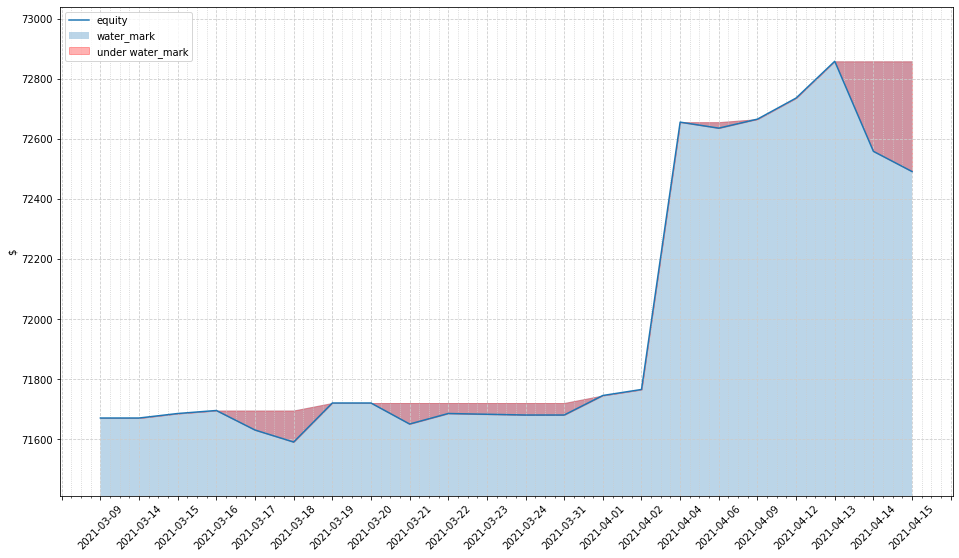

In [229]:
etoro_p.plot_equity(major_loc=1)

In [228]:
etoro_p.trade_day

'2021-04-15'

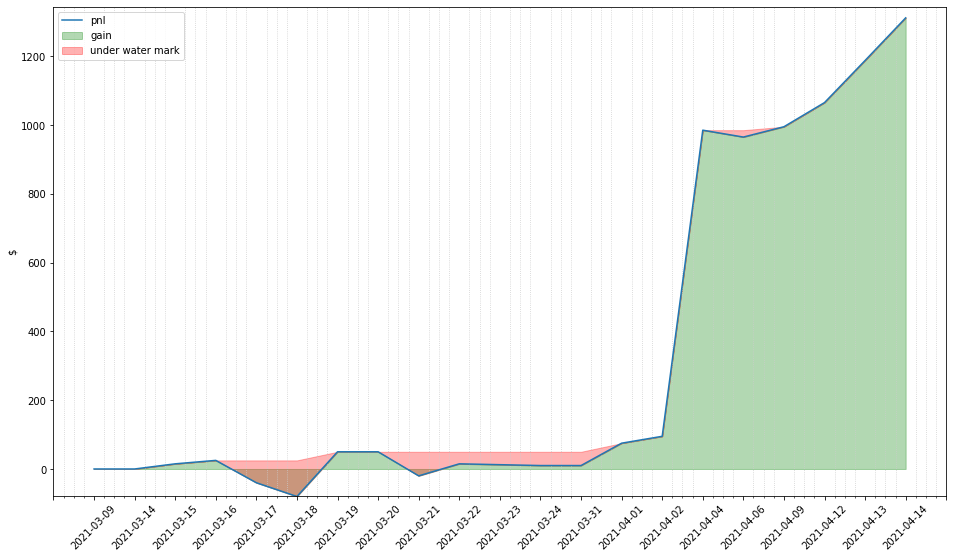

In [142]:
etoro_p.plot_pnl(major_loc=1)

In [626]:
# bh_p.pnl['water_mark'] = bh_p.pnl.apply(lambda row: bh_p.get_hwm(row), axis=1)
# bh_p.pnl['max_gain'] = bh_p.pnl.apply(lambda row: row['water_mark'] - bh_p.pnl['equity'].values[0], axis=1)
# bh_p.pnl.to_csv('bh_pnl_2021-04-13.csv')

In [129]:
bh_p.trade_day = day
bh_p.save_csvs()

positions saved to path: bh_pnl_2021-04-14.csv
pnl saved to path: bh_portfolio_2021-04-14.csv


In [102]:
bh_p.positions['broker'] = 'bh'

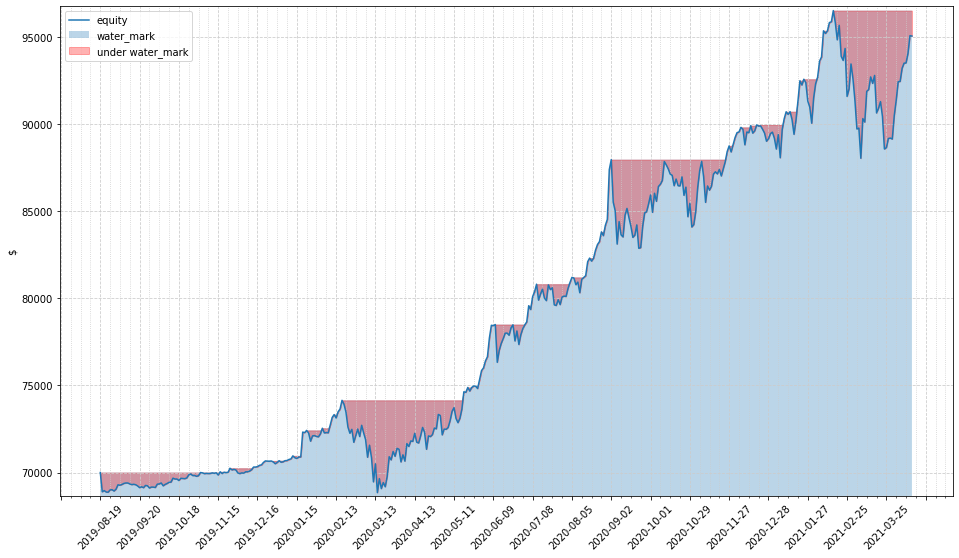

In [155]:
bh_p.plot_equity()

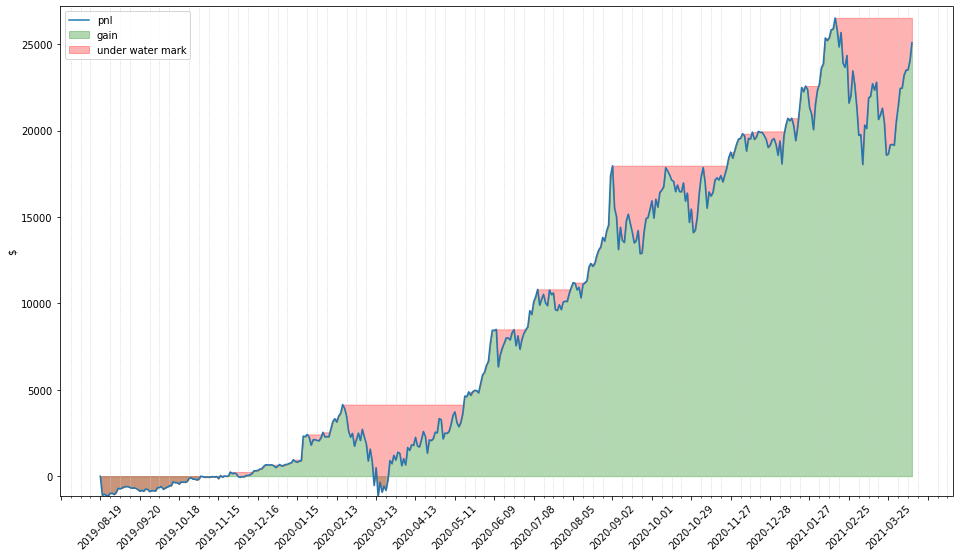

In [118]:
bh_p.plot_pnl()

In [64]:
bh_p.equity

95091.68

In [230]:
bh_p.pnl[-100:]

,date,equity,water_mark,pnl,max_gain
315,2020-11-19,87405.24,87971.49,17405.24,17971.49
316,2020-11-20,87030.85,87971.49,17030.85,17971.49
317,2020-11-23,87442.54,87971.49,17442.54,17971.49
318,2020-11-24,87849.54,87971.49,17849.54,17971.49
319,2020-11-25,88438.03,88438.03,18438.03,18438.03
...,...,...,...,...,...
410,2021-04-09,93519.96,96530.32,23519.96,26530.32
411,2021-04-12,94073.55,96530.32,24073.55,26530.32
412,2021-04-13,95091.68,96530.32,25091.68,26530.32
413,2021-04-14,95099.11,96530.32,25099.11,26530.32


In [233]:
bh_p.trade_day

NameError: name 'get_trade_day' is not defined

In [583]:
create_historic_equity(bh_p)

2019-08-22 2020-12-14 12:29:11.598158 ['NVDA']
2019-08-23 00:00:00 4830.0 65170.0 3723.5296478271484 68893.52964782715
2019-08-26 00:00:00 4830.0 65170.0 3792.525436401367 68962.52543640137
2019-08-27 00:00:00 4830.0 65170.0 3708.859146118164 68878.85914611816
2019-08-28 00:00:00 4830.0 65170.0 3699.2220001220703 68869.22200012207
2019-08-29 00:00:00 4830.0 65170.0 3831.8450622558594 69001.84506225586
2019-08-30 00:00:00 4830.0 65170.0 3843.5472106933594 69013.54721069336
2019-09-03 00:00:00 4830.0 65170.0 3766.9097900390625 68936.90979003906
2019-09-04 00:00:00 4830.0 65170.0 3872.228073120117 69042.22807312012
2019-09-05 00:00:00 4830.0 65170.0 4124.166793823242 69294.16679382324
2019-09-06 00:00:00 4830.0 65170.0 4099.156188964844 69269.15618896484
2019-09-09 00:00:00 4830.0 65170.0 4141.605255126953 69311.60525512695
2019-09-10 00:00:00 4830.0 65170.0 4203.098037719727 69373.09803771973
2019-09-11 00:00:00 4830.0 65170.0 4229.485427856445 69399.48542785645
2019-09-12 00:00:00 4830.

2020-02-07 00:00:00 12502.0 57498.0 14784.367335796356 72282.36733579636
2020-02-10 00:00:00 12502.0 57498.0 15221.216460704803 72719.2164607048
2020-02-11 00:00:00 12502.0 57498.0 15664.509446382523 73162.50944638252
2020-02-12 00:00:00 12502.0 57498.0 15829.493755817413 73327.49375581741
2020-02-13 00:00:00 12502.0 57498.0 15633.590529203415 73131.59052920341
2020-02-14 00:00:00 12502.0 57498.0 15987.539833307266 73485.53983330727
2020-02-18 00:00:00 12502.0 57498.0 16149.593300104141 73647.59330010414
2020-02-19 00:00:00 12502.0 57498.0 16648.71700811386 74146.71700811386
2020-02-20 00:00:00 12502.0 57498.0 16422.183961868286 73920.18396186829
2020-02-21 00:00:00 12502.0 57498.0 15978.04810333252 73476.04810333252
2020-02-24 00:00:00 12502.0 57498.0 15116.536307811737 72614.53630781174
2020-02-25 00:00:00 12502.0 57498.0 14758.541198253632 72256.54119825363
2020-02-26 00:00:00 12502.0 57498.0 14982.438619375229 72480.43861937523
2020-02-27 00:00:00 12502.0 57498.0 14237.188832044601

2020-07-16 00:00:00 21842.96 48157.04 31863.716574192047 80020.75657419206
2020-07-17 00:00:00 21842.96 48157.04 31714.62310552597 79871.66310552598
2020-07-20 00:00:00 21842.96 48157.04 32618.562388896942 80775.60238889695
2020-07-21 00:00:00 21842.96 48157.04 32349.285812854767 80506.32581285477
2020-07-22 00:00:00 21842.96 48157.04 32453.18475675583 80610.22475675584
2020-07-23 00:00:00 21842.96 48157.04 31473.275960445404 79630.31596044541
2020-07-24 00:00:00 21842.96 48157.04 31436.31552362442 79593.35552362443
2020-07-27 00:00:00 21842.96 48157.04 31768.535894870758 79925.57589487077
2020-07-28 00:00:00 21842.96 48157.04 31484.80172109604 79641.84172109605
2020-07-29 00:00:00 21842.96 48157.04 31926.478528499603 80083.51852849961
2020-07-30 00:00:00 21842.96 48157.04 31974.47773694992 80131.51773694993
2020-07-31 00:00:00 21842.96 48157.04 31955.369266986847 80112.40926698686
2020-08-03 00:00:00 21842.96 48157.04 32415.411526679993 80572.45152668
2020-08-04 00:00:00 21842.96 4815

2020-12-18 00:00:00 29901.16 40098.84 49800.13601779938 89898.97601779937
2020-12-21 00:00:00 29901.16 40098.84 49805.78872823715 89904.62872823715
2020-12-22 00:00:00 29901.16 40098.84 49615.59601402283 89714.43601402282
2020-12-23 00:00:00 29901.16 40098.84 49395.15092945099 89493.99092945099
2020-12-24 00:00:00 29901.16 40098.84 48928.58352136612 89027.42352136612
2020-12-28 00:00:00 29901.16 40098.84 49063.98335647583 89162.82335647583
2020-12-29 00:00:00 29901.16 40098.84 49364.671670913696 89463.5116709137
2020-12-30 00:00:00 29901.16 40098.84 49449.86639356613 89548.70639356613
2020-12-31 00:00:00 29901.16 40098.84 49104.37497663498 89203.21497663498
2021-01-04 00:00:00 29901.16 40098.84 48479.30921506882 88578.14921506881
2021-01-05 00:00:00 29901.16 40098.84 49307.86018228531 89406.7001822853
2021-01-06 00:00:00 29901.16 40098.84 47977.19950580597 88076.03950580597
2021-01-07 00:00:00 29901.16 40098.84 49601.47303676605 89700.31303676605
2021-01-08 00:00:00 29901.16 40098.84 5

In [588]:
bh_p.pnl

,date,equity,water_mark,pnl,max_gain
0,2019-08-19,70000.00,71670.0,0.00,1670.0
1,2019-08-23,68893.53,71670.0,-1106.47,1670.0
2,2019-08-26,68962.53,71685.0,-1037.47,1685.0
3,2019-08-27,68878.86,71695.0,-1121.14,1695.0
4,2019-08-28,68869.22,71630.0,-1130.78,1630.0
...,...,...,...,...,...
408,2021-04-07,93216.12,NaN,23216.12,NaN
409,2021-04-08,93509.36,NaN,23509.36,NaN
410,2021-04-09,93519.96,NaN,23519.96,NaN
411,2021-04-12,94073.55,NaN,24073.55,NaN


In [471]:
import yfinance as yf

yf_data = yf.Ticker("MSFT")

# get historical market data
hist = yf_data.history(start=date)

In [472]:
hist

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2019-08-21,136.32,137.24,135.78,136.55,14970300,0.0,0
2019-08-22,136.43,136.96,134.10,135.56,18697000,0.0,0
2019-08-23,134.98,136.12,130.66,131.24,38508600,0.0,0
2019-08-26,132.82,133.38,131.74,133.27,20312600,0.0,0
2019-08-27,134.19,134.52,132.49,133.55,23102100,0.0,0
...,...,...,...,...,...,...,...
2021-04-06,247.61,249.40,246.88,247.86,22931900,0.0,0
2021-04-07,247.81,250.93,247.19,249.90,22719800,0.0,0
2021-04-08,252.77,254.14,252.00,253.25,23625200,0.0,0


In [441]:
bh_p.cash + bh_p.invested, bh_p.cash + bh_p.allocated, round(bh_p.allocated - bh_p.invested, 2)

(70000.0, 94073.54999999999, 24073.55)

In [442]:
22603*3.36, bh_p.cash*3.36, bh_p.allocated*3.36

(75946.08, 119020.74239999999, 197066.38559999998)

In [346]:
import glob
pnl.to_csv(f'pnl_{today}.csv')
glob.glob('pnl_*.csv')

['pnl_2021-04-12.csv']

In [402]:
bh_pnl = pd.DataFrame()

In [288]:
dt = datetime.datetime.today() - datetime.timedelta(days=0)
date = datetime.datetime.date(dt)
equity = 71670+p.pnl
date, equity

(datetime.date(2021, 4, 13), 72735.23)

In [302]:
for i, row in pnl.iterrows():
    break
row.name

0

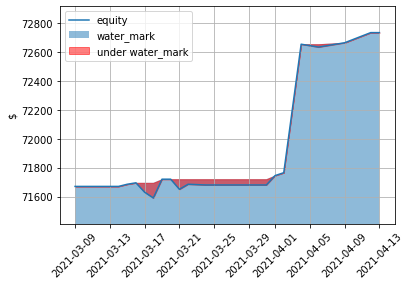

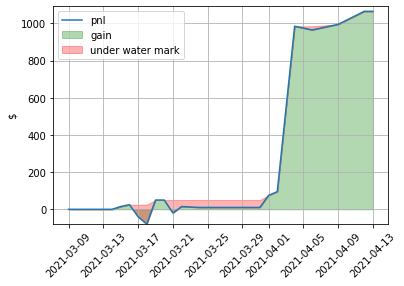

In [460]:
date, datetime.datetime.strptime(date, '%Y-%m-%d')

('2019-08-22', datetime.datetime(2019, 8, 22, 0, 0))

In [398]:
dt = datetime.datetime.today() - datetime.timedelta(days=120)
date = datetime.datetime.date(dt)
date

datetime.date(2020, 12, 14)

In [399]:
# p.positions = pd.DataFrame()
p.add_position('SNOW', 330.5, 10.0, date=date)
# portfolio.positions = portfolio.positions[:-1]
p.positions

,currency,open_date,open_price,open_value_usd,quantity,symbol
0,USD,2020-08-31,39.25,942.00,24.0,AAPL
1,USD,2020-01-19,1150.00,2300.00,2.0,AMZN
2,USD,2020-04-13,147.00,2205.00,15.0,BA
3,USD,2020-01-19,215.00,430.00,2.0,BABA
4,USD,2020-04-13,11.50,989.00,86.0,CCL
5,USD,2020-10-15,117.10,1405.20,12.0,DIS
6,USD,2020-12-14,60.15,2406.00,40.0,HYMTF
7,USD,2021-03-14,12.80,1280.00,100.0,INVZ
8,USD,2020-04-13,71.50,1430.00,20.0,IRBT
9,USD,2020-04-13,370.80,2224.80,6.0,LMT


In [404]:
bh_p.positions.to_csv(f'bh_portfolio_{today}.csv')

'2021-04-12'

In [462]:
import pandas_datareader as dr
# A list of all of the exchange rate that FRED has daily data for can be found here: http://research.stlouisfed.org/fred2/categories/94
start_date = '2021-04-01'
start_date = datetime.datetime.strptime(date, '%Y-%m-%d')
dr.get_data_fred('NVDA', start=date, end=start_date+datetime.timedelta(days=1))

RemoteDataError: Unable to read URL: https://fred.stlouisfed.org/graph/fredgraph.csv?id=NVDA
Response Text:
b'<!DOCTYPE html>\r\n<html lang="en">\r\n<head>\r\n    <meta charset="utf-8">\r\n    <meta http-equiv="X-UA-Compatible" content="IE=edge">\r\n    <meta name="viewport" content="width=device-width, initial-scale=1">\r\n    <title>Error - St. Louis Fed</title>\r\n    <meta name="description" content="">\r\n    <meta name="keywords" content="">\r\n    <link rel="stylesheet" type="text/css" href="/css/bootstrap.custom.min.css?1551876305">\r\n    <link rel="stylesheet" type="text/css" href="/css/home.min.css?1553087253">\r\n    <link rel="stylesheet" type="text/css" href="/assets/components-font-awesome/css/font-awesome.min.css?1477392983">\r\n    <link rel="stylesheet" type="text/css" href="/assets/select2/dist/css/select2.min.css">\r\n    <style>p {\r\n        margin-bottom: 1.5em;\r\n    }</style>\r\n</head>\r\n<body>\r\n<!-- Google Tag Manager (noscript) -->\n<noscript>\n    <iframe src="https://www.googletagmanager.com/ns.html?id=GTM-5L322W" height="0" width="0" style="display:none;visibility:hidden"></iframe>\n</noscript>\n\n<!-- End Google Tag Manager (noscript) -->\n<link rel="preconnect" href="https://fonts.gstatic.com">\n<link href="https://fonts.googleapis.com/css2?family=Roboto&display=swap" rel="stylesheet">\n<link href="https://fonts.googleapis.com/css2?family=Roboto+Slab&display=swap" rel="stylesheet">\n<link href="https://fonts.googleapis.com/icon?family=Material+Icons" rel="stylesheet">\n<!--googleoff: snippet-->\n<a href="#content-container" class="sr-only sr-only-focusable">Skip to main content</a>\n<!--googleon: snippet-->\n<a name="top" id="top"></a>\n<!--[if lt IE 7 ]>\n<div id="container" class="ie6 container"><![endif]-->\n<!--[if IE 7 ]>\n<div id="container" class="ie7 container"><![endif]-->\n<!--[if IE 8 ]>\n<div id="container" class="ie8 container"><![endif]-->\n<!--[if IE 9 ]>\n<div id="container" class="ie9 container"><![endif]-->\n<!--[if IE]>\n<div id="container" class="ie container"><![endif]-->\n<!--[if !(IE)]><!-->\n<div id="container" class="container">\n  <!--<![endif]-->\n  <span class="EL-header-and-subheader">\n    <div class="header-not-home EL-nonhomepage-header">\n            <div id="hidden-user" class=\'hide\'></div>\n            <div id="action-modal"></div>\n            <div class=\'col-xs-12 center-content\' style="padding: 0px; height: inherit;">\n                <div class="col-md-4 col-xs-3" style="padding-left: 15px; padding-right: 15px;">\n                    <a class="research-logo-gtm" target="_" href="//research.stlouisfed.org/">\n                        <img class="header-logo-eagle hidden-sm hidden-xs" src="//fred.stlouisfed.org/images/masthead-no-bank.png" alt="Eagle Economic Research Logo">\n                        <img class="header-logo-eagle visible-sm-block visible-xs-block" src="//fred.stlouisfed.org/images/logo-eagle.png" alt="Eagle Logo">\n                    </a>\n                </div>\n                <div class="fred-logo-div col-xs-6 visible-sm-block visible-xs-block" style="padding-left: 15px; padding-right: 15px;">\n                    <a class="fred-logo-gtm" href="//fred.stlouisfed.org/">\n                        <picture>\n                            <img class="header-logo" src="//fred.stlouisfed.org/images/fred_30_notext.png" alt="mini fred 30 years logo">\n                        </picture>\n                    </a>\n                </div>\n                <div class="col-md-8 col-xs-3" style="padding-left: 15px; padding-right: 0px;">\n                    <ul id="blueheader-navbar" class="nav pull-right navbar-nav">\n                        <li class="blueheader-navbar-item center-content-vertically hidden-sm hidden-xs">\n                            <a class="research-resources-dropdown-gtm header-popover research-resources-popover-container" href="#">\n    <span id="research-resources-link" class="align-icon">Economic Research Resources\n        <span class="material-icons">\n            expand_more\n        </span>\n    </span>\n</a>\n\n<div id="research-resources-popover" class="hide">\n    <div class="col-xs-12 research-resources">\n        <div class="col-xs-7 research-resources-left-column">\n            <div class="research-resources-text">Explore resources provided by the Research Division at the Federal Reserve Bank of St. Louis</div>\n            <div>\n                <a rel="noopener" target="_blank" class="errd-research-link-gtm" href="https://research.stlouisfed.org" style="color: #364E71; font-family: Roboto; font-weight: 700px">research.stlouisfed.org <i class="fa fa-external-link" aria-hidden="true" style="font-size: 12px"></i></a>\n            </div>\n        </div>\n        <div class="col-xs-5 research-resources-right-column">\n            <ul class="header-list-popover list-group flush-list">\n                <li class="list-group-item">\n                    <a rel="noopener" target="_blank" class="errd-research-news-gtm" href="https://research.stlouisfed.org/publications/research-news/">Research News</a>\n                </li>\n                <li class="list-group-item">\n                    <a rel="noopener" target="_blank" class="errd-economists-gtm" href="https://research.stlouisfed.org/econ/">Economists</a>\n                </li>\n                <li class="list-group-item">\n                    <a rel="noopener" target="_blank" class="errd-publications-gtm"  href="https://research.stlouisfed.org/publications/">Publications</a>\n                </li>\n                <li class="list-group-item">\n                    <a rel="noopener" target="_blank" class="errd-working-papers-gtm" href="https://research.stlouisfed.org/wp/">Working Papers</a>\n                </li>\n                <li class="list-group-item">\n                    <a rel="noopener" target="_blank" class="errd-info-services-gtm" href="https://research.stlouisfed.org/info-services.html">Information Services</a>\n                </li>\n            </ul>\n        </div>\n    </div>\n</div>\n                        </li>\n                        <li class="blueheader-navbar-item center-content-vertically hidden-sm hidden-xs">\n                            <a class="Switch-Products-gtm header-popover switchprod-popover-container" href="#">\n  <span id="switchProd" class="align-icon"> Switch Products\n    <span class="material-icons">\n      expand_more\n    </span>\n  </span>\n</a>\n\n<div id="switchprod-popover" class="hide">\n  <ul id="switch-prod-list" class="list-group switch-products-list col-xs-12" role="menu" aria-labelledby="switchProduct">\n    <li id="ham-fred-dev" class="list-group-item product-fred">\n        <a class="burger-fred-gtm" role="menuitem" tabindex="-1" href="//fred.stlouisfed.org">\n            <span class="fred-ultra-selected fred-ultra">FRED</span>\n            <span class="pull-right switch-icon-padding"><img src="//fred.stlouisfed.org/images/favicon.ico" alt="" width="16" height="16"></span>\n        </a>\n      </li>\n      <li id="ham-alfred" class="hover-nav list-group-item">\n          <a rel="noopener" target="_blank" class="burger-alfred-gtm" role="menuitem" tabindex="-1" href="//alfred.stlouisfed.org">\n            <span class="fred-thin">AL</span>\n            <span class="fred-ultra">FRED</span>\n            <span class="pull-right switch-icon-padding"><img src="//fred.stlouisfed.org/images/greyRect.png" alt="" width="16" height="16"></span>\n        </a>\n      </li>\n      <li id="ham-geofred" class="hover-nav list-group-item">\n          <a rel="noopener" target="_blank" class="burger-geofred-gtm" role="menuitem" tabindex="-1" href="//geofred.stlouisfed.org">\n            <span class="fred-thin">GEO</span>\n            <span class="fred-ultra">FRED</span>\n            <span class="pull-right switch-icon-padding"><img src="//fred.stlouisfed.org/images/greyRect.png" alt="" width="16" height="16" onerror="this.src=\'https://fred.stlouisfed.org/images/favicons/favicon-16x16.png\'"></span>\n        </a>\n      </li>\n      <li id="ham-fraser" class="hover-nav list-group-item">\n          <a rel="noopener" target="_blank" class="burger-fraser-gtm" role="menuitem" tabindex="-1" href="https://fraser.stlouisfed.org/">\n            <span class="fred-ultra">FRASER</span>\n            <span class="pull-right switch-icon-padding"><img src="//fred.stlouisfed.org/images/greyRect.png" alt="" width="16" height="16" onerror="this.src=\'https://fred.stlouisfed.org/images/favicons/favicon-16x16.png\'"></span>\n        </a>\n      </li>\n      <li id="ham-ecolowdown" class="hover-nav-econ hover-nav list-group-item">\n          <a rel="noopener" target="_blank" class="burger-econlowdown-gtm" role="menuitem" tabindex="-1" href="https://www.econlowdown.org/">\n            <span class="fred-ultra-econ">ECON<br>LOWDOWN</span>\n            <span class=\'pull-right\' style="padding-top: 15px"><img src="//fred.stlouisfed.org/images/greyRect.png" alt="" width="16" height="16" onerror="this.src=\'https://fred.stlouisfed.org/images/favicons/favicon-16x16.png\'"></span>\n        </a>\n    </li>\n</ul>\n</div>                        </li>\n                        <li class="blueheader-navbar-item center-content-vertically hidden-sm hidden-xs">\n                            <div class="hidden-xs" id="signin-wrap">\n                                <div id="user-nav" class="EL-my-account-link"></div>\n                            </div>\n                        </li>\n                        <li class="blueheader-navbar-item center-content-vertically visible-sm-block visible-xs-block">\n                            <a class="hamburger-popover-container header-popover hamburger-gtm" href="#">\n    <span id="hamburger" class="hamburger-header material-icons">menu</span>\n</a>\n\n<div id="hamburger-popover" class="hide">\n    <div class="hamburger-search-padding">\n        <div class=\'input-group\'>\n            <input type="text" class="form-control search-input nav-search" placeholder="Search FRED data...">\n            <span class="input-group-btn">\n                <button class="btn search-submit nav-search-button" type="submit">\n                    <i class="fa fa-search"></i>\n                </button>\n            </span>\n        </div>\n    </div>\n    <div id="hamburger-navigation">\n        <div id="hamburger-home">\n            <ul class="list-group flush-list hamburger-list col-xs-12">\n                <li class="list-group-item">\n                    <a class="burger-calendar-gtm" href="https://fred.stlouisfed.org/releases/calendar">Release Calendar</a>\n                </li>\n                <li class="list-group-item hamburger-menu-item" onclick="hamburgerMenuNavigation(\'hamburger-tools\')">\n                    <a class="burger-tools-gtm" href="#">FRED Tools\n                        <span class="material-icons iconHeader hamburger-nxt-page-icon align-middle">\n                            chevron_right\n                        </span>\n                    </a>\n                </li>\n                <li class="list-group-item">\n                    <a class="burger-blog-gtm" href="https://fredblog.stlouisfed.org">FRED Blog</a>\n                </li>\n                <li class="list-group-item">\n                    <a class="burger-news-gtm" href="https://news.research.stlouisfed.org/category/fred-announcements/">FRED News</a>\n                </li>\n                <li class="list-group-item hamburger-menu-item" onclick="hamburgerMenuNavigation(\'hamburger-about-fred\')">\n                    <a class="burger-about-gtm" href="#">About FRED\n                        <span class="material-icons iconHeader hamburger-nxt-page-icon align-middle">\n                            chevron_right\n                        </span>\n                    </a>\n                </li>\n                <li class="list-group-item">\n                    <a class="burger-myaccount-gtm" href="https://research.stlouisfed.org/useraccount/">My Account</a>\n                </li>\n            </ul>\n            <ul class="list-group flush-list hamburger-list col-xs-12">\n                <li class="list-group-item hamburger-menu-item" onclick="hamburgerMenuNavigation(\'hamburger-products\')">\n                    <a class="burger-switch-gtm" href="#">\n                        <span>Switch Products<span class="material-icons iconHeader hamburger-nxt-page-icon">\n                            chevron_right\n                        </span>\n                        </span>\n                    </a>\n                </li>\n                <li class="list-group-item hamburger-menu-item" onclick="hamburgerMenuNavigation(\'hamburger-research\')">\n                    <a class="burger-resources-gtm" href="#">\n                        <span>Economic Research Resources<span class="material-icons iconHeader hamburger-nxt-page-icon">\n                            chevron_right\n                        </span>\n                        </span>\n                    </a>\n                    <p>Explore resources provided by the Research Division at the Federal Reserve Bank of St. Louis.</p>\n                </li>\n            </ui>\n        </div>\n        \n        <div id="hamburger-about-fred" class="hide">\n            <ul class="list-group hamburger-submenu-list col-xs-12">\n                <li class="list-group-item hamburger-menu-item" onclick="hamburgerMenuNavigation(\'hamburger-home\')">\n                    <span>\n                        <span class="material-icons iconHeader hamburger-previous-page-icon">chevron_left</span>\n                        About FRED\n                    </span>\n                </li>\n                <li class="list-group-item">\n                    <a class="burger-fred-about-gtm" href="https://fredhelp.stlouisfed.org/fred/about/about-fred/what-is-fred/"> What is FRED</a>\n                </li>\n                <li class="list-group-item">\n                    <a class="burger-tutorials-gtm" href="https://fredhelp.stlouisfed.org"> Tutorials</a>\n                </li>\n                <li class="list-group-item">\n                    <a class="burger-contact-us-gtm" href="https://fred.stlouisfed.org/contactus/"> Contact Us</a>\n                </li>\n            </ul>\n        </div>\n        \n        <div id="hamburger-tools" class="hide">\n            <ul class="list-group hamburger-submenu-list col-xs-12">\n                <li class="list-group-item hamburger-menu-item" onclick="hamburgerMenuNavigation(\'hamburger-home\')">\n                    <span>\n                        <span class="material-icons iconHeader hamburger-previous-page-icon">chevron_left</span>\n                        FRED Tools\n                    </span>\n                </li>\n                <li class="list-group-item">\n                    <a class="burger-fred-excel-add-in-gtm" href="https://fred.stlouisfed.org/fred-addin"> FRED Add-in for Excel</a>\n                </li>\n                <li class="list-group-item">\n                    <a class="burger-fred-api-gtm" href="https://fred.stlouisfed.org/docs/api/fred"> FRED API</a>\n                </li>\n                <li class="list-group-item">\n                    <a class="burger-fredcast-gtm" href="https://research.stlouisfed.org/useraccount/fredcast"> FREDcast Forecasting Game</a>\n                </li>\n                <li class="list-group-item">\n                    <a class="burger-fred-mobile-apps-gtm" href="https://fred.stlouisfed.org/fred-mobile"> FRED Mobile Apps</a>\n                </li>\n            </ul>\n        </div>\n        \n        <div id="hamburger-research" class="hide">\n            <ul class="list-group hamburger-submenu-list col-xs-12">\n                <li class="list-group-item hamburger-menu-item" onclick="hamburgerMenuNavigation(\'hamburger-home\')">\n                    <span>\n                        <span class="material-icons iconHeader hamburger-previous-page-icon">chevron_left</span>\n                        Economic Research Resources\n                    </span>\n                </li>\n                <li class="list-group-item">\n                    <a rel="noopener" target="_blank" class="burger-research-news-gtm" href="https://research.stlouisfed.org/publications/research-news"> Research News</a>\n                </li>\n                <li class="list-group-item">\n                    <a rel="noopener" target="_blank" class="burger-economists-gtm" href="https://research.stlouisfed.org/econ/"> Economists</a>\n                </li>\n                <li class="list-group-item">\n                    <a rel="noopener" target="_blank" class="burger-publications-gtm" href="https://research.stlouisfed.org/publications/"> Publications</a>\n                </li>\n                <li class="list-group-item">\n                    <a rel="noopener" target="_blank" class="burger-working-papers-gtm" href="https://research.stlouisfed.org/wp/"> Working Papers</a>\n                </li>\n                <li class="list-group-item">\n                    <a rel="noopener" target="_blank" class="burger-info-services-gtm" href="https://research.stlouisfed.org/info-services.html"> Information Services</a>\n                </li>\n            </ul>\n        </div>\n        \n        <div id="hamburger-products" class="hide">\n            <ul class="list-group hamburger-submenu-list col-xs-12" style="padding-bottom: 0px !important">\n                <li class="list-group-item hamburger-menu-item" onclick="hamburgerMenuNavigation(\'hamburger-home\')">\n                    <span>\n                        <span class="material-icons iconHeader hamburger-previous-page-icon">chevron_left</span>\n                        Switch Products\n                    </span>\n                </li>\n            </ul>\n            <ul id="switch-prod-list" class="list-group switch-products-list col-xs-12" role="menu" aria-labelledby="switchProduct">\n    <li id="ham-fred-dev" class="list-group-item product-fred">\n        <a class="burger-fred-gtm" role="menuitem" tabindex="-1" href="//fred.stlouisfed.org">\n            <span class="fred-ultra-selected fred-ultra">FRED</span>\n            <span class="pull-right switch-icon-padding"><img src="//fred.stlouisfed.org/images/favicon.ico" alt="" width="16" height="16"></span>\n        </a>\n      </li>\n      <li id="ham-alfred" class="hover-nav list-group-item">\n          <a rel="noopener" target="_blank" class="burger-alfred-gtm" role="menuitem" tabindex="-1" href="//alfred.stlouisfed.org">\n            <span class="fred-thin">AL</span>\n            <span class="fred-ultra">FRED</span>\n            <span class="pull-right switch-icon-padding"><img src="//fred.stlouisfed.org/images/greyRect.png" alt="" width="16" height="16"></span>\n        </a>\n      </li>\n      <li id="ham-geofred" class="hover-nav list-group-item">\n          <a rel="noopener" target="_blank" class="burger-geofred-gtm" role="menuitem" tabindex="-1" href="//geofred.stlouisfed.org">\n            <span class="fred-thin">GEO</span>\n            <span class="fred-ultra">FRED</span>\n            <span class="pull-right switch-icon-padding"><img src="//fred.stlouisfed.org/images/greyRect.png" alt="" width="16" height="16" onerror="this.src=\'https://fred.stlouisfed.org/images/favicons/favicon-16x16.png\'"></span>\n        </a>\n      </li>\n      <li id="ham-fraser" class="hover-nav list-group-item">\n          <a rel="noopener" target="_blank" class="burger-fraser-gtm" role="menuitem" tabindex="-1" href="https://fraser.stlouisfed.org/">\n            <span class="fred-ultra">FRASER</span>\n            <span class="pull-right switch-icon-padding"><img src="//fred.stlouisfed.org/images/greyRect.png" alt="" width="16" height="16" onerror="this.src=\'https://fred.stlouisfed.org/images/favicons/favicon-16x16.png\'"></span>\n        </a>\n      </li>\n      <li id="ham-ecolowdown" class="hover-nav-econ hover-nav list-group-item">\n          <a rel="noopener" target="_blank" class="burger-econlowdown-gtm" role="menuitem" tabindex="-1" href="https://www.econlowdown.org/">\n            <span class="fred-ultra-econ">ECON<br>LOWDOWN</span>\n            <span class=\'pull-right\' style="padding-top: 15px"><img src="//fred.stlouisfed.org/images/greyRect.png" alt="" width="16" height="16" onerror="this.src=\'https://fred.stlouisfed.org/images/favicons/favicon-16x16.png\'"></span>\n        </a>\n    </li>\n</ul>\n        </div>\n    </div>\n</div>                        </li>\n                    </ul>\n                </div>\n            </div>\n        <div id="notifications-container"></div>\n\n    </div>\n    <div class=\'sub-header center-content col-md-12 hidden-sm hidden-xs\'>\n      <div class="col-lg-3 col-md-3" style="padding-left: 15px; padding-right: 15px;" >\n          <a class="fred-logo-gtm" href="//fred.stlouisfed.org/">\n                <img id="fred-logo-subheader" src="//fred.stlouisfed.org/images/FINAL_30_years.png" alt="fred 30 years subheader logo">\n          </a>\n      </div>\n      <div class="col-lg-2 fred-trust-text center-content-vertically hidden-md hidden-sm hidden-xs">\n            Your trusted data source since 1991.\n      </div>\n      <div class="col-lg-7 col-md-9 hidden-sm hidden-xs" style="padding-left: 15px; padding-right: 15px;">\n          <div class="search-header-div pull-right col-xs-8 hidden-sm hidden-xs">\n              <div class=\'input-group EL-header-search-container\' id="search-container-header">\n                  <select id="head-search" class=\'EL-header-search\'>\n                      <option></option>\n                  </select>\n                  <input type="hidden" name="st" class="search-text-input">\n                  <span class="input-group-btn">\n                    <button class="btn search-submit-select2" id="select2-nav-search-button" type="submit">\n                        <i class="fa fa-search"></i>\n                    </button>\n                  </span>\n              </div>\n          </div>\n\n          <nav class="col-xs-12 navbar hidden-sm hidden-xs EL-main-nav" id="subheader-nav" role="navigation">\n    <div class="navbar-padding navbar-collapse collapse">\n        <ul id="subheader-navbar" class="nav pull-right navbar-nav">\n            <li class="nav-li-subheader">\n                <a href="https://fred.stlouisfed.org/releases/calendar" class="nav-releasecal-subheader-gtm">Release Calendar</a>\n            </li>\n            <li class="nav-li-subheader">\n              <a class="sub-header-nav-tools-gtm  header-popover fred-tools-container" href="#">\n  <span id="fred-tools-link" class="align-icon">FRED Tools\n    <span class="material-icons md-16">\n      expand_more\n    </span>\n  </span>\n</a>\n\n<div id="fred-tools-popover" class="hide">\n  <ul class="header-list-popover list-group flush-list">\n    <li class="list-group-item">\n      <a class="homepage-nav-tools-fred-excel-addin-gtm" href="https://fred.stlouisfed.org/fred-addin">FRED Add-in for Excel</a>\n    </li>\n    <li class="list-group-item">\n      <a class="homepage-nav-tools-fred-api-gtm" href="https://fred.stlouisfed.org/docs/api/fred">FRED API</a>\n    </li>\n    <li class="list-group-item">\n      <a class="homepage-nav-tools-fredcast-gtm"  href="https://research.stlouisfed.org/useraccount/fredcast">FREDcast Forecasting Game</a>\n    </li>\n    <li class="list-group-item">\n      <a class="homepage-nav-tools-fred-mobile-gtm" href="https://fred.stlouisfed.org/fred-mobile">FRED Mobile Apps</a>\n    </li>\n  </ul>\n</div>\n            </li>\n            <li class="nav-li-subheader">\n                <a href="https://news.research.stlouisfed.org/category/fred-announcements/" class="nav-news-subheader-gtm">FRED News</a>\n            </li>\n            <li class="nav-li-subheader">\n                <a href="https://fredblog.stlouisfed.org/" class="nav-fredblog-subheader-gtm">FRED Blog</a>\n            </li>\n            <li class="nav-li-subheader">\n              \n<a class="subheader-nav-about-gtm header-popover about-fred-container" href="#">\n  <span id="about-fred-link" class="align-icon">About FRED\n      <span class="material-icons md-16">\n      expand_more\n      </span>\n  </span>\n</a>\n\n<div id="about-fred-popover" class="hide">\n    <ul class="header-list-popover list-group flush-list">\n      <li class="list-group-item">\n        <a class="about-fred-what-is-gtm" href="https://fredhelp.stlouisfed.org/fred/about/about-fred/what-is-fred/">\n          What is FRED\n        </a>\n      </li>\n      <li class="list-group-item">\n        <a class="about-fred-tutorials-gtm" href="https://fredhelp.stlouisfed.org">\n          Tutorials\n        </a>\n      </li>\n      <li class="list-group-item">\n        <a class="about-fred-contact-gtm" href="https://fred.stlouisfed.org/contactus/ ">\n          Contact Us\n        </a>\n      </li>\n    </ul>\n</div>\n            </li>\n        </ul>\n    </div>\n</nav>\n      </div>\n    </div>\n  </span>\n  <div style="padding-left: 10px; padding-right: 10px;" class="clear" id="content-container">\n\n    \r\n<!--BEGIN CONTENT-->\r\n<div class="error-container">\r\n    <h1>Looking for Something?</h1>\r\n    <p class="large">We\'re sorry, the page you were looking for cannot be found. Please feel free\r\n        to <a href="/contactus/">contact us</a> if the problem persists.</p>\r\n    <p class="large">Searching may help find what are you looking for. If all else fails, you can head\r\n        <a href="/">Home</a>\r\n    </p>\r\n    <form action="/searchresults" id="search-form-404">\r\n        <label for="search-text">Search for:</label><br>\r\n        <input type="text" name="st" id="search-text" size="50" class="form-control">\r\n        <input type="submit" class="btn btn-default" value="Search" id="404-search-button" name="404-search-button">\r\n    </form>\r\n</div>\r\n<link href="/css/footer.min.css?1553087256" rel="stylesheet" media="all">\r\n<!--END CONTENT-->\r\n    <br class="clear">\n</div>\n\n    <div id="footer" class="EL-footer hidden-print row ">\n        <a name="foot-search-a" class="xs-anchor"></a>\n       <form action="//fred.stlouisfed.org/searchresults" id="foot-search-form" class="visible-xs-block col-xs-12">\n           <div id="foot-search-container">\n               <input type="text" id="foot-search" name="st" class="js-placeholder" title="Search FRED"><button type=\'submit\' class="pull-right" id="foot-search-button">&nbsp;</button>\n           </div>\n       </form>\n\n       \n        <div class="col-xs-12 col-sm-2">\n            <ul>\n                <li class="footer-section-header">SERVICES</li>\n                <li><a href="//fred.stlouisfed.org/">FRED&reg;</a></li>\n                <li><a href="//alfred.stlouisfed.org/">ALFRED&reg;</a></li>\n                <li><a href="//geofred.stlouisfed.org">GeoFRED&reg;</a></li>\n                <li><a href="//fraser.stlouisfed.org">FRASER&reg;</a></li>\n                <li><a href="//ideas.repec.org">IDEAS</a></li>\n            </ul>\n        </div>\n\n        <div class="col-xs-12 col-sm-2 col-md-3">\n            <ul>\n                <li class="footer-section-header">RESEARCH</li>\n                <li><a href="//research.stlouisfed.org/regecon/">Eighth District Economy</a></li>\n                <li><a href="//research.stlouisfed.org/wp/">Working Papers</a></li>\n                <li><a href="//research.stlouisfed.org/conferences/">Events</a></li>\n                <li><a href="//research.stlouisfed.org/publications/">Publications</a></li>\n                <li><a href="//research.stlouisfed.org/resources.html">Other Resources</a></li>\n            </ul>\n        </div>\n\n        <div class="col-xs-12 col-sm-3">\n            <ul>\n                <li class="footer-section-header">TOOLS</li>\n                <li><a href="//fred.stlouisfed.org/fred-mobile/">FRED Mobile Apps</a></li>\n                <li><a href="//fred.stlouisfed.org/fred-addin/">FRED Add-In for Excel&reg;</a></li>\n                <li><a href="//research.stlouisfed.org/useraccount/fredcast/">\n                    FREDcast\xc2\xae\n                </a></li>\n                <li><a href="//fredhelp.stlouisfed.org/fred/graphs/share-my-fred-graph/embedded-fred-a-widget-just-for-you/">Embeddable FRED Widget</a></li>\n                <li><a href="//fred.stlouisfed.org/docs/api/fred/">Developer/APIs</a></li>\n            </ul>\n        </div>\n        <div class="col-xs-12 col-sm-2 ">\n            <ul>\n                <li class="footer-section-header">ABOUT</li>\n                <li><a href="//research.stlouisfed.org/jobopps/">Careers</a></li>\n                <li><a class="contact-hash footer-contactus-link-gtm" href="//fred.stlouisfed.org/contactus/">Contact</a></li>\n                <li><a href="//research.stlouisfed.org/rss/">RSS</a></li>\n                <li><a href="//fred.stlouisfed.org/legal/">Legal</a></li>\n                <li><a href="//research.stlouisfed.org/privacy.html">Privacy Notice & Policy</a></li>\n            </ul>\n        </div>\n        <div class="col-xs-12 col-sm-3 col-md-2">\n            <ul>\n                <li class="footer-section-header">OUR SITES</li>\n                <li><a href="//www.stlouisfed.org/">St. Louis Fed</a></li>\n                <li><a href="//federalreserveonline.org">Federal Reserve System</a></li>\n                <li><a href="//research.stlouisfed.org">Research Division</a></li>\n                <li><a href="//www.stlouisfed.org/education/">Education Resources</a></li>\n            </ul>\n        </div>\n            </div>\n\n        <div class="footer2 hidden-print row EL-footer2">\n        <div class="col-xs-12 col-sm-3">\n            <h3>Need Help?</h3>\n            <div>\n                <a class="footer-questions-gtm" href="//fred.stlouisfed.org/contactus/" class="q-and-a-link-gtm">Questions or Comments</a>\n            </div>\n\n            <div style="padding: 10px 0 20px 0;">\n                <a class="footer-fredhelp-gtm" href="//fredhelp.stlouisfed.org/">FRED Help</a>\n            </div>\n        </div>\n\n        <div class="col-xs-12 col-sm-6">\n            <div class="col-xs-12">\n                <h3>Subscribe to the FRED newsletter</h3>\n                <div id="subscribe-div" class="form-horizontal newsletter-form" style="padding:0;margin:0">\n                    <div>\n                        <div class="col-xs-12" style="padding-left: 0;">\n                            <div class="input-group">\n                                <input id="subscribe-email-input" type="text" name="email" placeholder="Email" class="form-control email">\n                                <span class="input-group-btn"><button id="subscribe-email-btn" type="button" class="btn btn-default subscribe-newsletter-btn-gtm" style="color: #333;">Subscribe</button></span>\n                            </div>\n                        </div>\n                    </div>\n                </div>\n            </div>\n        </div>\n    <hr class="visible-xs-block">\n    <div class="col-xs-12 col-sm-2 col-sm-offset-1">\n        <h3>Follow us</h3>\n        <div class="col-xs-12" style="margin-bottom: 10px; padding-left: 0;">\n            <a href="http://bit.ly/9ngC3L"><i class="fa fa-fw fa-2x fa-twitter"></i></a>\n            <a href="http://bit.ly/HeaderFB"><i class="fa fa-fw fa-2x fa-facebook"></i></a>\n            <a href="http://bit.ly/aY9TVF"><i class="fa fa-fw fa-2x fa-youtube"></i></a>\n            <a href="http://bit.ly/d056zL"><i class="fa fa-fw fa-2x fa-linkedin"></i></a>\n        </div>\n    </div>\n</div>\n\n    <div class="hidden-print visible-xs-block">\n        <a style="margin: 5px; display: block; padding:5px 10px; text-align: center" href="#top">Back to Top</a>\n    </div>\n\n    <div id="footer-bottom" class="EL-footer-bottom">\n        <div id="address">\n            Federal Reserve Bank of St. Louis,\n            One Federal Reserve Bank Plaza,\n            St. Louis, MO 63102\n        </div>\n    </div>\n\n</div>\n<script>\n    // function to parse cookies, and return the value\n    function getCookie(name) {\n        var cookies = document.cookie.split(\';\');\n        for (var i in cookies) {\n            var cookie = cookies[i].trim().split(\'=\');\n            if (cookie[0] == name) {\n                return cookie[1];\n            }\n        }\n        return null;\n    }\n    // certain pages in FRED set a custom tag variable\n    // this gets sent to Google Analytics so we can see what tags people are using\n    if (window.tags) {\n        dataLayer.push({\'tags\':tags});\n\n    }\n\n    // if the user is logged in, send the value of the liruid cookie to Google Analytics\n    var researchLiruid = getCookie(\'research-liruid\');\n    dataLayer.push({\'userId\':researchLiruid});\n\n</script>\n<!--<script src="//fred.stlouisfed.org/assets/modernizr/dist/1544152624.modernizr.min.js"></script>-->\n<script src="//fred.stlouisfed.org/assets/jquery/dist/1463764735.jquery.min.js" type="text/javascript"></script>\n<script src="//fred.stlouisfed.org/assets/bootstrap/dist/js/1550073338.bootstrap.min.js"></script>\n<script>\n    // force expire the .fred.stlouisfed.org _ga cookie\n    document.cookie = document.cookie + \'_ga=;domain=.fred.stlouisfed.org;expires=Sat, 01-Jan-2000 00:00:00 GMT\';\n</script>\n\n<script defer src="//fred.stlouisfed.org/assets/1617824374.jquery.menu-aim.min.js"></script>\n<script defer src="//fred.stlouisfed.org/js/lib/jquery/plugins/jquery.hotkeys.js"></script>\n\n    <script async src="//fred.stlouisfed.org/js/1617824374.common.min.js"></script>\n\n<script src="//fred.stlouisfed.org/js/jquery/plugins/jquery.cookie.js"></script>\n<script defer src="//fred.stlouisfed.org/js/1617363268.vendors.dist.js"></script>\n<!-- <script defer src="//fred.stlouisfed.org/js/1617363272.banner.js"></script> -->\n<script defer src="//research.stlouisfed.org/assets/js/1608146769.user-init.js"></script>\n<script defer src="//fred.stlouisfed.org/assets/select2/dist/js/1508969298.select2.full.min.js"></script>\n\r\n</body>\r\n</html>\r\n'

In [94]:
data.get_data_fred('DEXUSEU', start=start_date)

,DEXUSEU
DATE,
2021-04-01,1.1772
2021-04-02,1.1763


In [79]:
import pandas as pd
import pandas_datareader as dr
    
# change date range here
start_date = '2021-02-26'
end_date = '2021-03-01'
    
# retrieve market data of current ticker symbol
print('This is the table with HLOC, Volume, Adj Close prices')
eurusd = dr.data.DataReader('EURUSD%3DX', data_source='yahoo', start=start_date, end=end_date)
print(eurusd)

This is the table with HLOC, Volume, Adj Close prices
                High       Low      Open     Close  Volume  Adj Close
Date                                                                 
2021-02-26  1.218249  1.209175  1.216012  1.216042       0   1.216042
2021-03-01  1.210156  1.202993  1.209090  1.208956       0   1.208956
2021-03-02  1.208036  1.199400  1.204906  1.205110       0   1.205110


78.9000015258789

In [123]:
def get_previous_day(return_str=True):
    dt = datetime.datetime.strptime(trading_day(), '%Y-%m-%d')-datetime.timedelta(days=1)
    if return_str:
        return str(dt).split()[0]
    return dt
get_previous_day()

3.291750672


In [111]:
# or get it back as a dictionary (default)
si.get_quote_table("tcehy")

{'1y Target Est': 93.85,
 '52 Week Range': '49.00 - 99.40',
 'Ask': '0.00 x 0',
 'Avg. Volume': 3246195.0,
 'Beta (5Y Monthly)': 0.5,
 'Bid': '0.00 x 0',
 "Day's Range": '78.82 - 79.28',
 'EPS (TTM)': 2.52,
 'Earnings Date': nan,
 'Ex-Dividend Date': 'May 21, 2021',
 'Forward Dividend & Yield': '0.21 (0.26%)',
 'Market Cap': '760.45B',
 'Open': 79.0,
 'PE Ratio (TTM)': 31.3,
 'Previous Close': 79.42,
 'Quote Price': 78.9000015258789,
 'Volume': 984006.0}

In [103]:
si.get_day_gainers()

,Symbol,Name,Price (Intraday),Change,% Change,Volume,Avg Vol (3 month),Market Cap,PE Ratio (TTM)
0,NBNKF,Nordea Bank Abp,10.2800,2.2800,28.50,18554.0,4295.0,5.262300e+10,15.72
1,NUAN,"Nuance Communications, Inc.",53.3400,7.7600,17.03,57269000.0,3265000.0,1.520500e+10,NaN
2,BRPHF,Galaxy Digital Holdings Ltd.,29.8100,3.6000,13.72,315787.0,388221.0,2.752000e+09,23.29
3,AACAY,AAC Technologies Holdings Inc.,5.7600,0.5900,11.51,25222.0,88031.0,6.905000e+09,30.31
4,VEOEY,Veolia Environnement S.A.,29.4600,2.5300,9.39,22318.0,48249.0,1.665300e+10,159.24
5,SIG,Signet Jewelers Limited,66.4600,5.3800,8.81,1434000.0,1114000.0,3.479000e+09,NaN
6,RIOT,"Riot Blockchain, Inc.",53.8000,4.1700,8.40,13510000.0,28104000.0,4.526000e+09,NaN
7,BABA,Alibaba Group Holding Limited,241.7700,18.4600,8.26,27726000.0,17575000.0,6.585520e+11,27.34
8,AUOTY,AU Optronics Corp.,9.6100,0.5700,6.36,400064.0,221403.0,8.758000e+09,NaN
9,MARA,"Marathon Digital Holdings, Inc.",52.0900,3.0900,6.31,15112000.0,27738000.0,5.147000e+09,NaN
